## Final Project

### Import Libraries

In [1]:
# Import necesaary libraries
import pandas as pd

In [2]:
trxn = pd.read_csv(r'E:/Internship Studio/Project/Retail_data_Transactions.csv', header=0, encoding='utf-8')

In [3]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response = pd.read_csv(r'E:/Internship Studio/Project/Retail_data_Response.csv', header=0, encoding='utf-8')

In [5]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df = trxn.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
# features 
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [8]:
df.shape

(125000, 4)

In [9]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [10]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [11]:
# Missing Values 

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [14]:
# change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')

C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\2474506332.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\2474506332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\2474506332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [15]:
set(df['response'])

{0, 1}

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124969 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  124969 non-null  object        
 1   trans_date   124969 non-null  datetime64[ns]
 2   tran_amount  124969 non-null  int64         
 3   response     124969 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.8+ MB


In [17]:
# check outliers 
# z-score 

from scipy import stats
import numpy as np 

#calc z score
z_scores = np.abs(stats.zscore(df['tran_amount']))

#set a threshold

threshold= 3

outliers= z_scores>threshold


print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [18]:
# check outliers 
# z-score 

from scipy import stats
import numpy as np 

#calc z score
z_scores = np.abs(stats.zscore(df['response']))

#set a threshold

threshold= 3

outliers= z_scores>threshold


print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


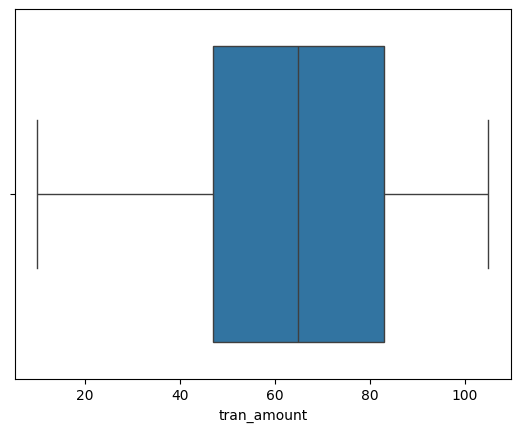

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x=df['tran_amount'])
plt.show()

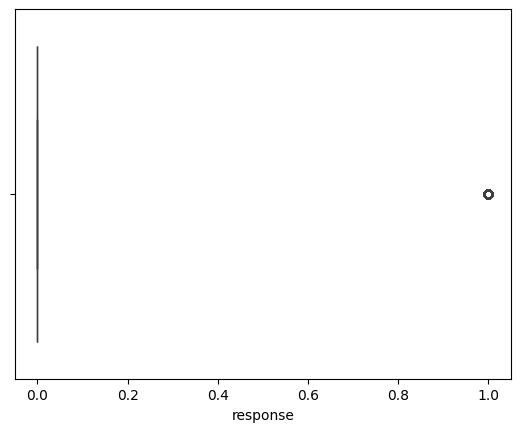

In [20]:
sns.boxplot(x=df['response'])
plt.show()

In [21]:
# creating new columns

df['month']= df['trans_date'].dt.month

C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\197175934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


In [22]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [23]:
# Which 3 months have had the highest transaction amounts?

monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [24]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

# sort

top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


In [25]:
sns.set(style='darkgrid')

C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\1920850022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id',y='count',data=top_5_cus, palette=colors )


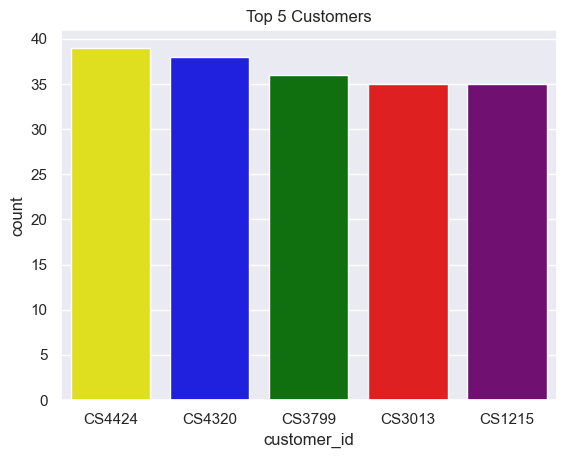

In [41]:
colors = ['yellow', 'blue', 'green', 'red', 'purple'] 

sns.barplot(x='customer_id',y='count',data=top_5_cus, palette=colors )
plt.title('Top 5 Customers')
plt.savefig('count_plot.png')

In [27]:
# Customers having highest value of orders

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()

# sort

top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\2125539671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal, palette=colors)


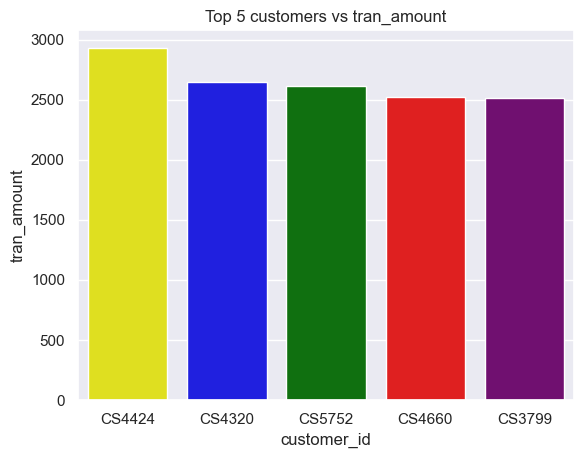

In [42]:
colors = ['yellow', 'blue', 'green', 'red', 'purple'] 

sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal, palette=colors)
plt.title('Top 5 customers vs tran_amount')
plt.savefig('bar_plot.png')

### Advanced Analytics

#### Time Serires Analysis

In [29]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [30]:
import matplotlib.dates as mdates 

df['month_year'] = df['trans_date'].dt.to_period('M')
df

C:\Users\Anish\AppData\Local\Temp\ipykernel_12564\2558405081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['trans_date'].dt.to_period('M')


,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


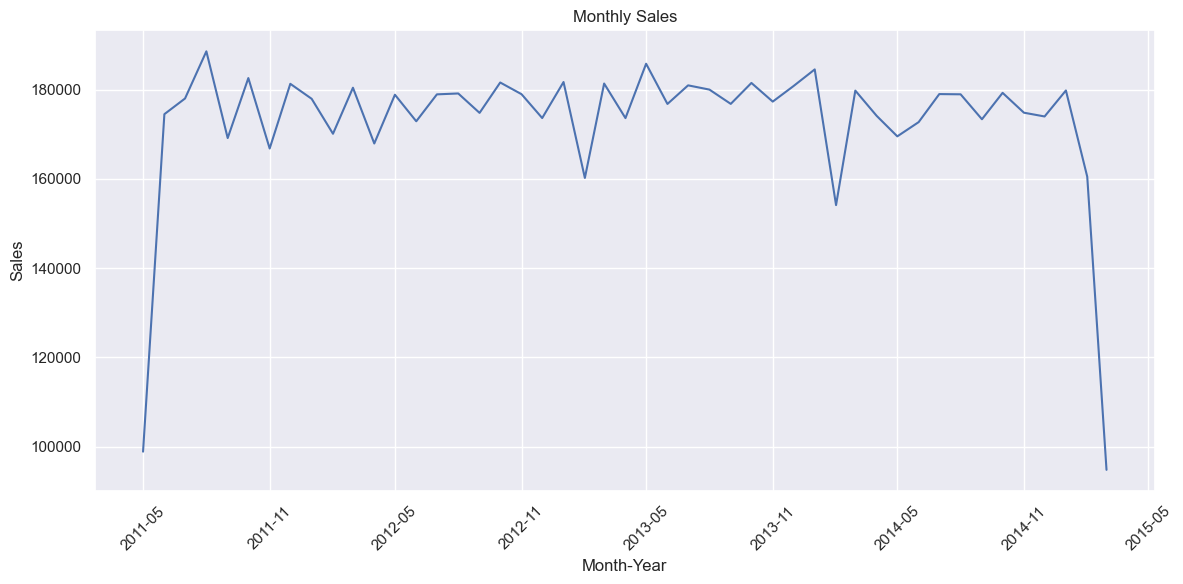

In [31]:
# Convert the PeriodIndex to DateTimeIndex
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set the x-axis interval
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.tight_layout()  # Adjust the layout for better visibility
plt.savefig('line_plot.png')
plt.show()

#### Cohort Segmentation

In [32]:
# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [33]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [34]:
# Customer segmentation

def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [35]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


#### Churn Analysis

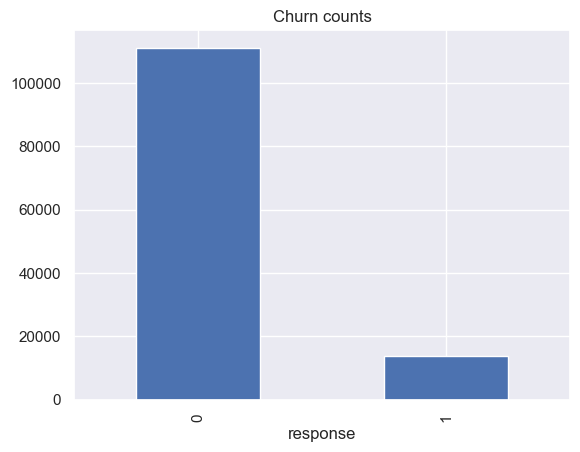

In [43]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')
plt.title('Churn counts')
plt.savefig('churn_plot.png')

#### Analyzing top customers

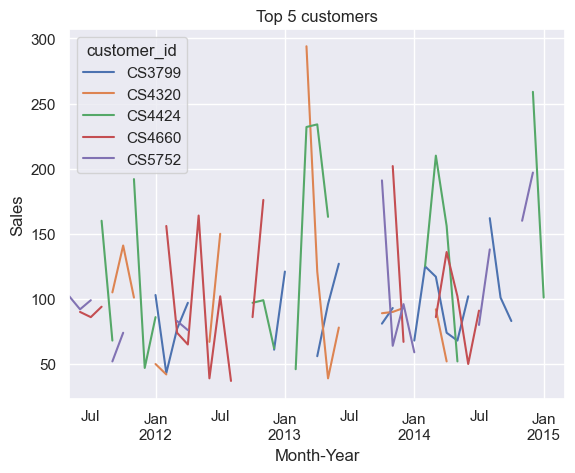

In [37]:
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Top 5 customers')
plt.savefig('line_plot1.png')
plt.show()

In [38]:
df.to_csv('Main_data.csv')

In [39]:
rfm.to_csv('Additional_analysis.csv')

In [40]:
# This command will use to insert the graphs into excel workbook

from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Load Excel file
workbook = load_workbook('Data.xlsx')
sheet = workbook.active

# Insert image
img = Image('line_plot1.png')
sheet.add_image(img, 'A1')

# Save the workbook
workbook.save('your_excel_file_with_plot.xlsx')
